In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
face_images = []   #list
for i in range(15) :
    file_path = "./faces/"+"img{0:02d}.jpg".format(i+1)
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_images.append(img)

In [4]:
animal_images = []   #list
for i in range(15) :
    file_path = "./animals/"+"img{0:02d}.jpg".format(i+1)
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    animal_images.append(img)

In [6]:
test_images = []   #list
for i in range(10) :   #10장의 이미지
    file_path = "./test_images/"+"img{0:02d}.jpg".format(i+1)
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)

In [7]:
def plot_images(row, col, images) :
    (fig, ax) = plt.subplots(row, col, figsize = (row, col))
    for i in range(row) :
        for j in range(col) :
            ax[i,j].imshow(images[i*col+j])
    plt.show()

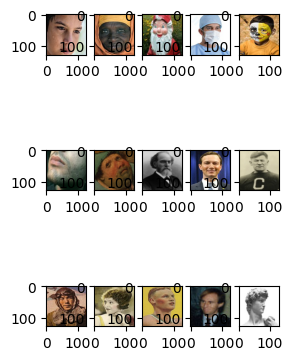

In [8]:
plot_images(row = 3, col =5, images = face_images)

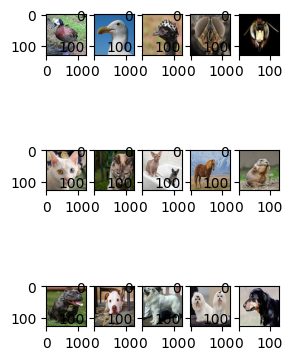

In [9]:
plot_images(row = 3, col =5, images = animal_images)

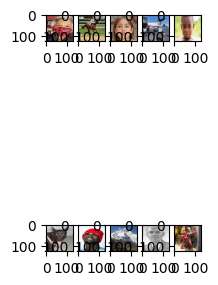

In [10]:
plot_images(row = 2, col =5, images = test_images)

In [13]:
X = face_images + animal_images   #list
y = [[1, 0]]*len(face_images) +[[0,1]]*len(animal_images)

In [14]:
print(y)

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [15]:
X = np.array(X)
y = np.array(y)


In [16]:
X = X/255.0  #정규화
test_images = np.array(test_images)
test_images = test_images/255.0

In [17]:
print(X.shape)

(30, 128, 128, 3)


In [19]:
model = tf.keras.models.Sequential([
    # convolution Block
    tf.keras.layers.Input(shape=(128, 128, 3)),

    # Block 1
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    # Block 2
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    # Block 3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    # DNN Fully connected
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,919,458 (7.32 MB)

 Trainable params: 1,919,458 (7.32 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - categorical_accuracy: 0.4667 - loss: 0.6932
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6953
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6938
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5333 - loss: 0.6893
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6894
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.7329
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6904
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6878
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6882
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 0.6856
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categori

In [25]:
model.save("MY_CNN.keras")

In [26]:
predicts = model.predict(test_images)
print(predicts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
[[1.0000000e+00 0.0000000e+00]
 [5.6428109e-20 1.0000000e+00]
 [1.7012876e-01 8.2987124e-01]
 [3.0007363e-23 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [9.0936399e-01 9.0636082e-02]
 [1.0000000e+00 0.0000000e+00]
 [1.3915944e-07 9.9999988e-01]
 [1.0000000e+00 1.0614847e-32]
 [1.9743797e-11 1.0000000e+00]]


In [27]:
prediction = np.round(predicts)

In [28]:
print(prediction)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [31]:
cnn_model = tf.keras.models.load_model("MY_CNN.keras")
prediction2 = cnn_model.predict(test_images)
print(np.round(prediction2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
